## The Basics

In [2]:
import pymc3 as pm
import numpy as np

C:\Users\benps\Anaconda3\envs\bayes\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

In [4]:
# Random variables are observed or unobserved:
model.basic_RVs

[mu, obs]

In [5]:
model.observed_RVs

[obs]

In [6]:
model.free_RVs

[mu]

In [ ]:
# Log probability of certain value of random variable:
model.logp({'mu':0}) > model.logp({'mu':1}) > model.logp({'mu':100})

In [7]:
with model:
    pm.Deterministic('mu_plus_2', mu+2)

assert model.logp({'mu_plus_2':0, 'mu':0}) == model.logp({'mu':0})

model.deterministics

[mu_plus_2]

In [8]:
with model:
    x = pm.Uniform('x', lower=0, upper=1)

# x is bounded, x_interval__ is unbounded, for sampling.

model.free_RVs

[mu, x_interval__]

In [9]:
# You can create vectors of random variables:

with model:
    random_vector = pm.Normal('random_vector', mu=mu, sd=1, shape=10)

In [10]:
model.basic_RVs

[mu, x_interval__, random_vector, obs]

In [11]:
# And you can initialize values, too:

with model:
    another_vector = pm.Normal('another_vector', mu=mu, sd=1, shape=5, testval=[1]*5)

In [12]:
# These are the initialized values:

another_vector.tag.test_value

array([1., 1., 1., 1., 1.])

In [13]:
# These are the values PyMC initialized with:

random_vector.tag.test_value

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
mu.tag.test_value

0.0

## Sampling

In [15]:
observations_of_height = [6, 7, 6.5, 5.9, 5.75]

In [16]:
with pm.Model() as model:
    # First, what are we trying to learn about?
    # We want to approximate the posterior dist'n
    # of real human height. We model it as normal,
    # because it is. But what are the parameters of
    # this normal dist'n? We don't know!
        
    sd = pm.Uniform('sd', lower=.25, upper=1)
    mu = pm.Uniform('mu', lower=5, upper=7)
    
    # Now that we've defined random variables
    # for each of these parameters, we can define
    # the observed variable, which represents our
    # assumptions about how the data are generated:
    
    height = pm.Normal('height', mu=mu, sd=sd, observed=observations_of_height)
    
# Let's stop and check what is going on:

print("Our observed random variables are:", model.observed_RVs)
print("Our unobserved random variables are:", model.free_RVs)

Our observed random variables are: [height]
Our unobserved random variables are: [sd_interval__, mu_interval__]


In [17]:
with model:
    # We've already defined our variables, so let's do some sampling:
    # (The NUTS sampler is used automatically)
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\benps\Anaconda3\envs\bayes\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 245.75it/s]


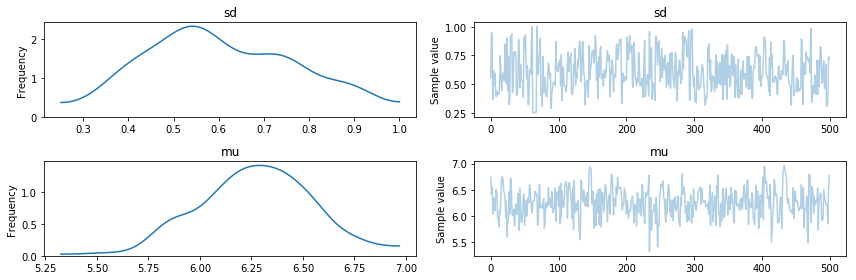

In [18]:
pm.traceplot(trace);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\benps\Anaconda3\envs\bayes\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 771.25it/s]


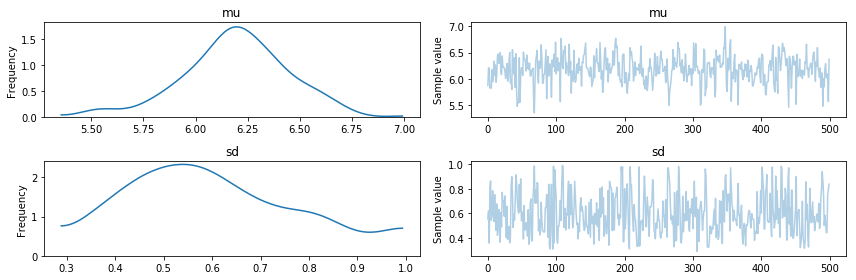

In [45]:
with pm.Model() as model:
    # Suppose instead we were willing to use a more
    # informative prior. Lets say our belief *about
    # the mean of heights* follows a normal distribution:
    sd = pm.Uniform('sd', lower=.25, upper=1)
    mu = pm.Normal('mu', mu=5.5, sd=1)
    
    height = pm.Normal('height', mu=mu, sd=sd, observed=observations_of_height)
    
    trace = pm.sample()
    
pm.traceplot(trace);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\benps\Anaconda3\envs\bayes\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 755.22it/s]


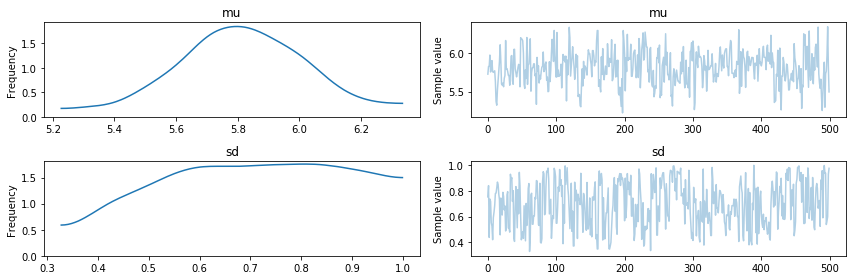

In [46]:
with pm.Model() as model:
    # Suppose instead we were willing to use a more
    # informative prior. Lets say our belief *about
    # the mean of heights* follows a normal distribution:
    sd = pm.Uniform('sd', lower=.25, upper=1)
    mu = pm.Normal('mu', mu=5.5, sd=.25)
    
    height = pm.Normal('height', mu=mu, sd=sd, observed=observations_of_height)
    
    trace = pm.sample()
    
pm.traceplot(trace);

In [47]:
pm.summary(trace)


mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  5.809            0.214            0.012            [5.429, 6.286]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  5.360          5.680          5.812          5.953          6.244


sd:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.698            0.174            0.011            [0.399, 0.982]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.380          0.561          0.703          0.843          0.979

